# 1. Import the data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import random
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
import seaborn as sns
%matplotlib inline

# 2. Visualization of the Transformed Data

In [3]:
with open("/Users/jjuke/Desktop/Study/BigDataAnalysis/TermProject/SPINDLE DATA/transformed_dataframe.pickle", "rb") as r:
    rawData = pickle.load(r)

len(rawData)

66524

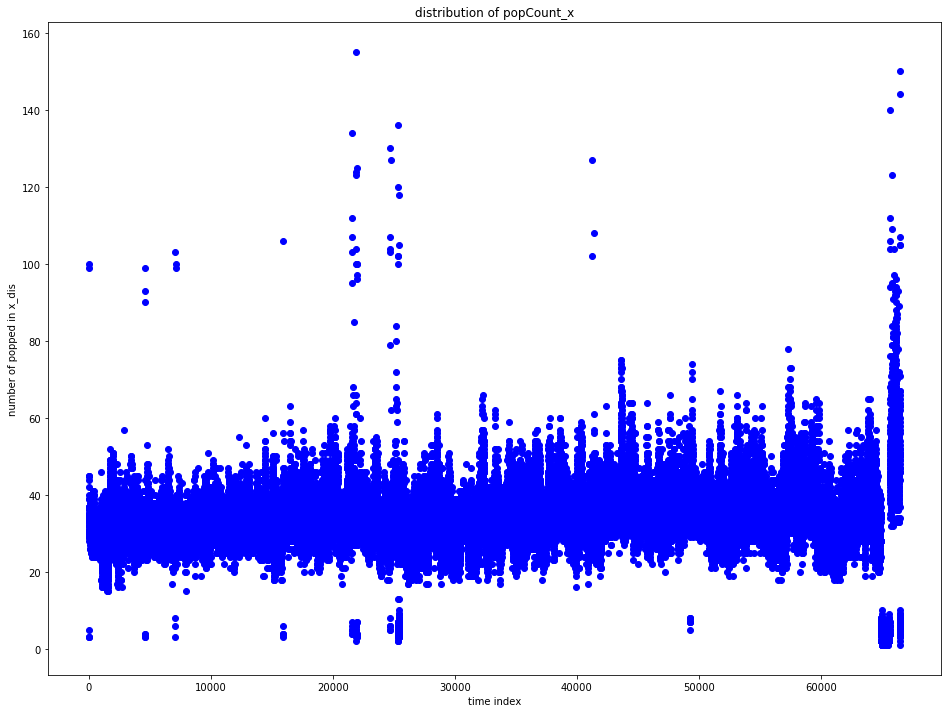

In [4]:
plt.figure(figsize=(16,12))
plt.plot(rawData['popCount_x'], 'bo')
plt.xlabel('time index')
plt.ylabel('number of popped in x_dis')
plt.title('distribution of popCount_x')
plt.show()

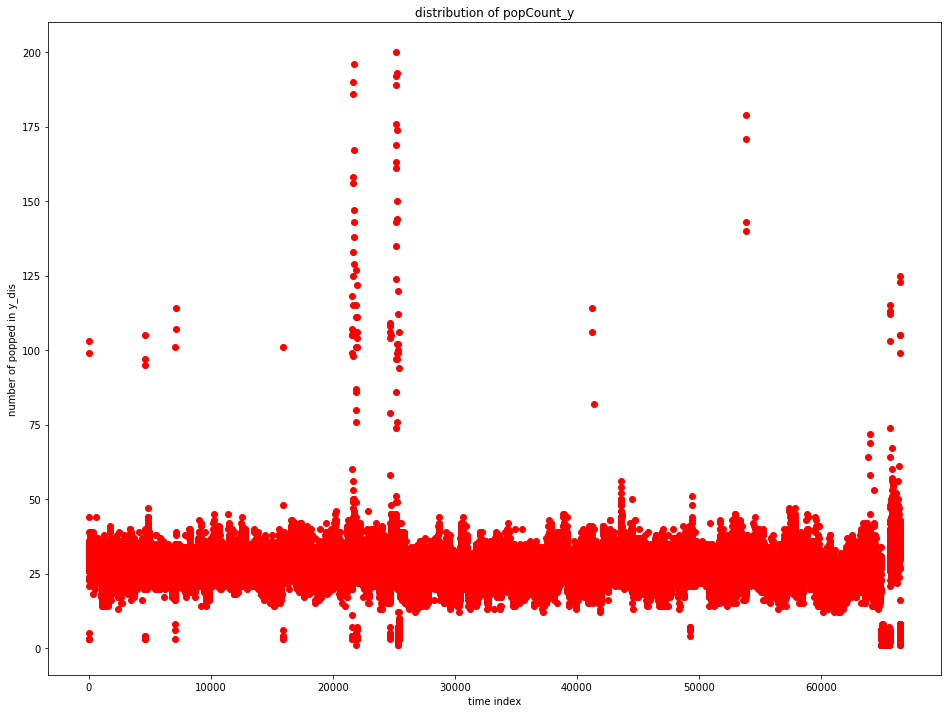

In [5]:
plt.figure(figsize=(16,12))
plt.plot(rawData['popCount_y'], 'ro')
plt.xlabel('time index')
plt.ylabel('number of popped in y_dis')
plt.title('distribution of popCount_y')
plt.show()

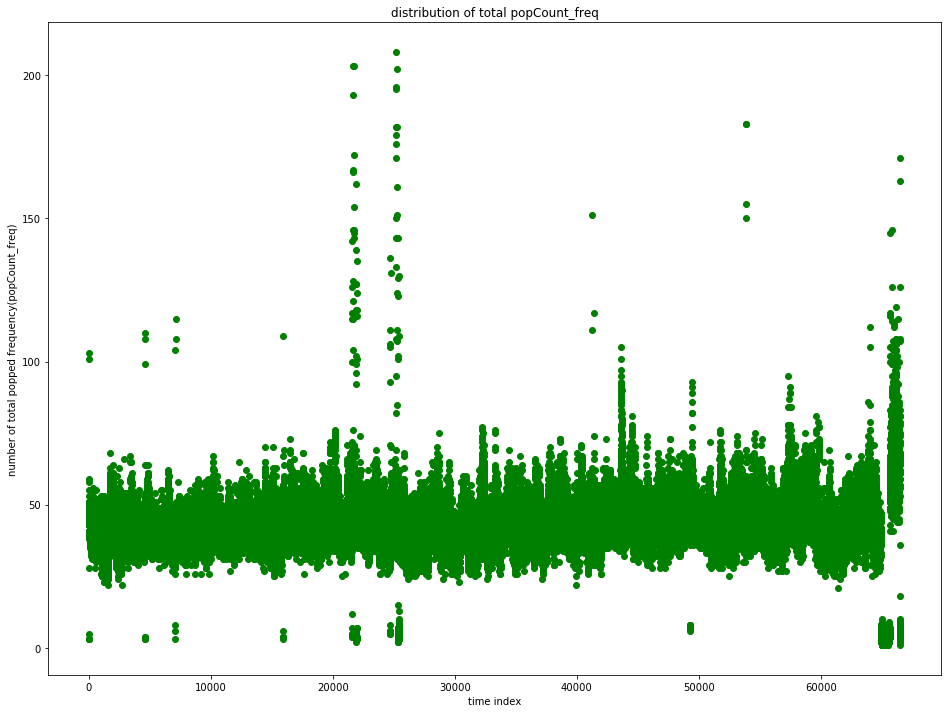

In [6]:
plt.figure(figsize=(16, 12))
plt.plot(rawData['popCount_freq'], 'go')
plt.xlabel('time index')
plt.ylabel('number of total popped frequency(popCount_freq)')
plt.title('distribution of total popCount_freq')
plt.show()

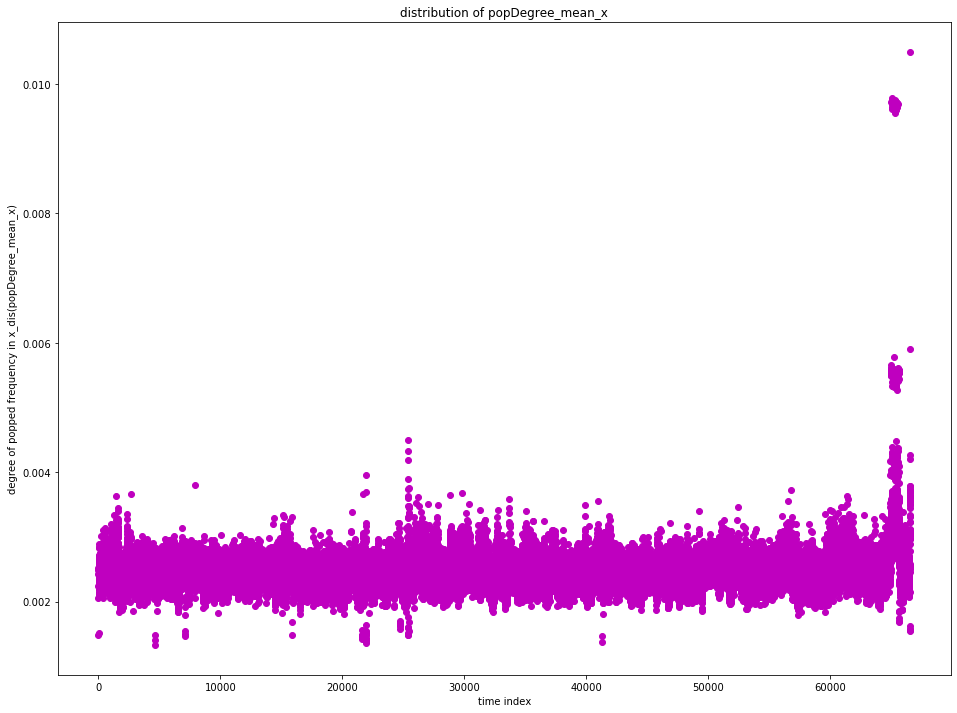

In [11]:
plt.figure(figsize=(16, 12))
plt.plot(rawData['popDegree_mean_x'], 'mo')
plt.xlabel('time index')
plt.ylabel('degree of popped frequency in x_dis(popDegree_mean_x)')
plt.title('distribution of popDegree_mean_x')
plt.show()

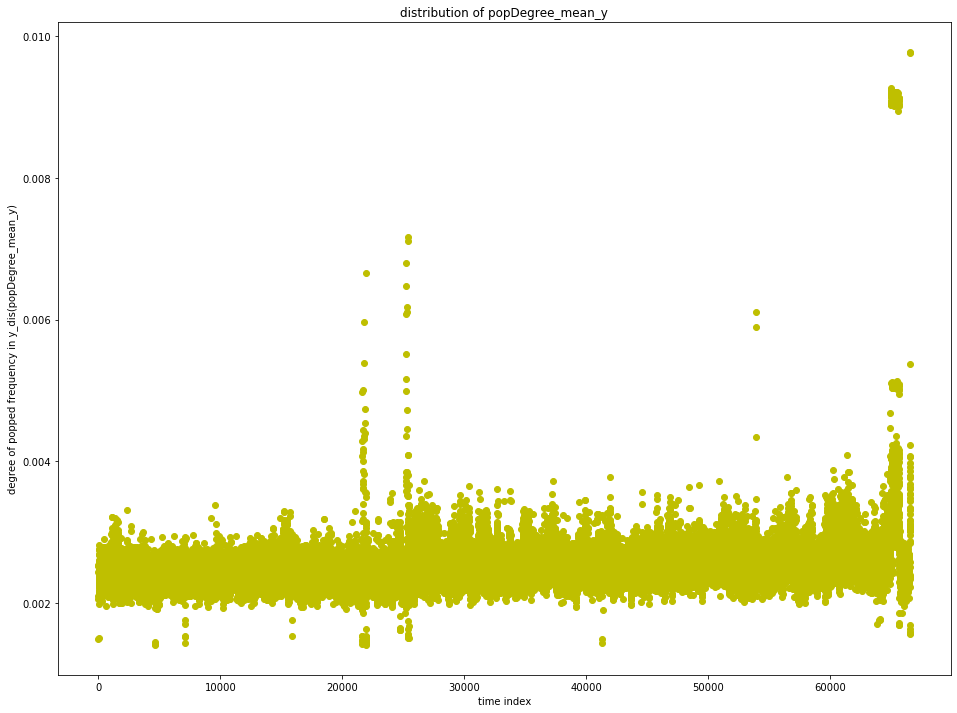

In [12]:
plt.figure(figsize=(16, 12))
plt.plot(rawData['popDegree_mean_y'], 'yo')
plt.xlabel('time index')
plt.ylabel('degree of popped frequency in y_dis(popDegree_mean_y)')
plt.title('distribution of popDegree_mean_y')
plt.show()

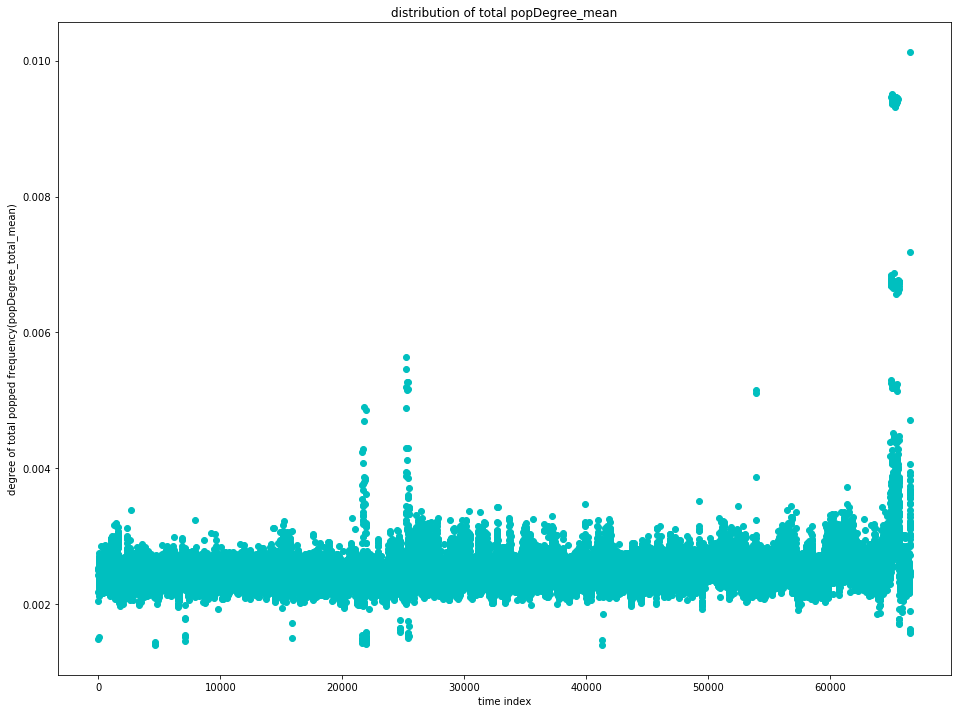

In [10]:
plt.figure(figsize=(16, 12))
plt.plot(rawData['popDegree_total_mean'], 'co')
plt.xlabel('time index')
plt.ylabel('degree of total popped frequency(popDegree_total_mean)')
plt.title('distribution of total popDegree_mean')
plt.show()

# 3. Visualize the Frequency Distribution of each Clustered Data

In [4]:
import pandas as pd
with open("/Users/jjuke/Desktop/Study/BigDataAnalysis/TermProject/SPINDLE DATA/k_means_normalized_k3.pickle", "rb") as rc:
    clusteredData_3 = pickle.load(rc)

with open("/Users/jjuke/Desktop/Study/BigDataAnalysis/TermProject/SPINDLE DATA/k_means_normalized_k4.pickle", "rb") as rc:
    clusteredData_4 = pickle.load(rc)

with open("/Users/jjuke/Desktop/Study/BigDataAnalysis/TermProject/SPINDLE DATA/k_means_normalized_k5.pickle", "rb") as rc:
    clusteredData_5 = pickle.load(rc)

print(len(clusteredData_3))
print(len(clusteredData_4))
print(len(clusteredData_5))

66524
66524
66524


## 1) Result of Clustering with k = 3

In [32]:
clusteredData_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66524 entries, 0 to 66523
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Filtered_freq_list    66524 non-null  object 
 1   popCount_freq         66524 non-null  float64
 2   popCount_x            66524 non-null  float64
 3   popCount_y            66524 non-null  float64
 4   popDegree_mean_x      66524 non-null  float64
 5   popDegree_mean_y      66524 non-null  float64
 6   popDegree_total_mean  66524 non-null  float64
 7   prediction            66524 non-null  int32  
dtypes: float64(6), int32(1), object(1)
memory usage: 3.8+ MB


In [33]:
clusteredData_3.head()

,Filtered_freq_list,popCount_freq,popCount_x,popCount_y,popDegree_mean_x,popDegree_mean_y,popDegree_total_mean,prediction
0,"[3968.7937587517504, 3969.793958791758, 3970.7...",-4.291769,-4.114624,-3.752816,0.057590,-0.017735,0.050883,1
1,"[3969.793958791758, 3970.7941588317663, 3971.7...",-4.291769,-4.114624,-3.752816,-0.155662,-0.228152,-0.179486,1
2,"[3970.7941588317663, 3971.794358871774, 3972.7...",-4.291769,-4.114624,-3.752816,0.141771,0.031307,0.122098,1
3,"[3970.7941588317663, 3971.794358871774, 3972.7...",-4.078151,-3.851549,-3.437364,-1.365511,-1.316518,-1.425339,1
4,"[1.0002000400080016, 2.000400080016003, 3.0006...",-1.621547,-0.826193,-0.913746,-0.751061,-1.204531,-1.014634,1


### (1) Extract the data by each cluster and rand number

In [5]:
# cluster 별 data 추출
cluster_0 = clusteredData_3[clusteredData_3.prediction == 0]
cluster_1 = clusteredData_3[clusteredData_3.prediction == 1]
cluster_2 = clusteredData_3[clusteredData_3.prediction == 2]

print(len(clusteredData_3))
print(len(cluster_0) + len(cluster_1) + len(cluster_2))
print(len(cluster_0), len(cluster_1), len(cluster_2))

66524
66524
42004 24411 109


In [35]:
random.seed(2021)
randInd_0 = random.randrange(0, len(cluster_0))
randInd_1 = random.randrange(0, len(cluster_1))
randInd_2 = random.randrange(0, len(cluster_2))

print(randInd_0)
print(randInd_1)
print(randInd_2)

26490
20635
69


### (2) Cluster의 random point 별 Frequency 분포 확인

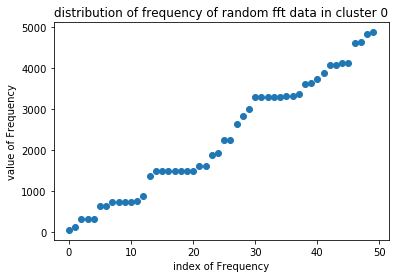

In [36]:
plt.plot(cluster_0.iloc[randInd_0]['Filtered_freq_list'], 'o')
plt.xlabel('index of Frequency')
plt.ylabel('value of Frequency')
plt.title('distribution of frequency of random fft data in cluster 0')
plt.show()

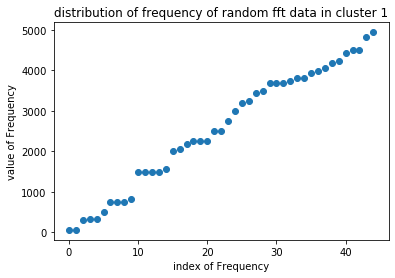

In [37]:
plt.plot(cluster_1.iloc[randInd_1]['Filtered_freq_list'], 'o')
plt.xlabel('index of Frequency')
plt.ylabel('value of Frequency')
plt.title('distribution of frequency of random fft data in cluster 1')
plt.show()

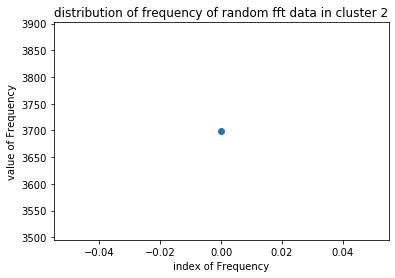

In [38]:
plt.plot(cluster_2.iloc[randInd_2]['Filtered_freq_list'], 'o')
plt.xlabel('index of Frequency')
plt.ylabel('value of Frequency')
plt.title('distribution of frequency of random fft data in cluster 2')
plt.show()

## 2) Result of Clustering with k = 4

In [39]:
clusteredData_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66524 entries, 0 to 66523
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Filtered_freq_list    66524 non-null  object 
 1   popCount_freq         66524 non-null  float64
 2   popCount_x            66524 non-null  float64
 3   popCount_y            66524 non-null  float64
 4   popDegree_mean_x      66524 non-null  float64
 5   popDegree_mean_y      66524 non-null  float64
 6   popDegree_total_mean  66524 non-null  float64
 7   prediction            66524 non-null  int32  
dtypes: float64(6), int32(1), object(1)
memory usage: 3.8+ MB


In [40]:
clusteredData_4.head()

,Filtered_freq_list,popCount_freq,popCount_x,popCount_y,popDegree_mean_x,popDegree_mean_y,popDegree_total_mean,prediction
0,"[3968.7937587517504, 3969.793958791758, 3970.7...",-4.291769,-4.114624,-3.752816,0.057590,-0.017735,0.050883,1
1,"[3969.793958791758, 3970.7941588317663, 3971.7...",-4.291769,-4.114624,-3.752816,-0.155662,-0.228152,-0.179486,1
2,"[3970.7941588317663, 3971.794358871774, 3972.7...",-4.291769,-4.114624,-3.752816,0.141771,0.031307,0.122098,1
3,"[3970.7941588317663, 3971.794358871774, 3972.7...",-4.078151,-3.851549,-3.437364,-1.365511,-1.316518,-1.425339,1
4,"[1.0002000400080016, 2.000400080016003, 3.0006...",-1.621547,-0.826193,-0.913746,-0.751061,-1.204531,-1.014634,0


### (1) Extract the data by each cluster and define rand numbers

In [6]:
# cluster 별 data 추출
cluster_0 = clusteredData_4[clusteredData_4.prediction == 0]
cluster_1 = clusteredData_4[clusteredData_4.prediction == 1]
cluster_2 = clusteredData_4[clusteredData_4.prediction == 2]
cluster_3 = clusteredData_4[clusteredData_4.prediction == 3]

print(len(clusteredData_3))
print(len(cluster_0) + len(cluster_1) + len(cluster_2) + len(cluster_3))
print(len(cluster_0), len(cluster_1), len(cluster_2), len(cluster_3))

66524
66524
43992 22329 109 94


In [7]:
random.seed(1996)
# random points of cluster 0
randInd_0 = random.randrange(0, len(cluster_0))
randInd_0_1 = random.randrange(0, len(cluster_0))
randInd_0_2 = random.randrange(0, len(cluster_0))
randInd_0_3 = random.randrange(0, len(cluster_0))

# random points of cluster 1
randInd_1 = random.randrange(0, len(cluster_1))
randInd_1_1 = random.randrange(0, len(cluster_1))
randInd_1_2 = random.randrange(0, len(cluster_1))
randInd_1_3 = random.randrange(0, len(cluster_1))

# random points of cluster 2
randInd_2 = random.randrange(0, len(cluster_2))
randInd_2_1 = random.randrange(0, len(cluster_2))
randInd_2_2 = random.randrange(0, len(cluster_2))
randInd_2_3 = random.randrange(0, len(cluster_2))
randInd_2_4 = random.randrange(0, len(cluster_2))
randInd_2_5 = random.randrange(0, len(cluster_2))
randInd_2_6 = random.randrange(0, len(cluster_2))
randInd_2_7 = random.randrange(0, len(cluster_2))


# random points of cluster 3
randInd_3 = random.randrange(0, len(cluster_3))
randInd_3_1 = random.randrange(0, len(cluster_3))
randInd_3_2 = random.randrange(0, len(cluster_3))
randInd_3_3 = random.randrange(0, len(cluster_3))
randInd_3_4 = random.randrange(0, len(cluster_3))
randInd_3_5 = random.randrange(0, len(cluster_3))
randInd_3_6 = random.randrange(0, len(cluster_3))
randInd_3_7 = random.randrange(0, len(cluster_3))

print(randInd_0, randInd_0_1, randInd_0_2, randInd_0_3)
print(randInd_1, randInd_1_1, randInd_1_2, randInd_1_3)
print(randInd_2, randInd_2_1, randInd_2_2, randInd_2_3, randInd_2_4, randInd_2_5, randInd_2_6, randInd_2_7)
print(randInd_3, randInd_3_1, randInd_3_2, randInd_3_3, randInd_3_4, randInd_3_5, randInd_3_6, randInd_3_7)

37338 36600 29804 27449
18377 9912 7274 17514
48 6 83 33 36 88 47 48
92 7 1 76 43 75 2 52


### (2) Cluster의 random point 별 Frequency 분포 확인

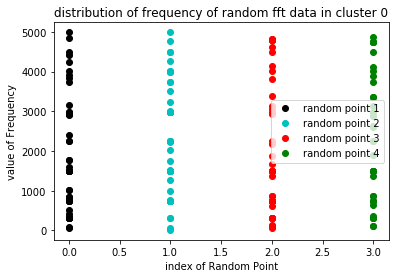

In [15]:
x_1 = [0 for i in range(len(cluster_0.iloc[randInd_0]['Filtered_freq_list']))]
x_2 = [1 for i in range(len(cluster_0.iloc[randInd_0_1]['Filtered_freq_list']))]
x_3 = [2 for i in range(len(cluster_0.iloc[randInd_0_2]['Filtered_freq_list']))]
x_4 = [3 for i in range(len(cluster_0.iloc[randInd_0_3]['Filtered_freq_list']))]

plt.plot(x_1, cluster_0.iloc[randInd_0]['Filtered_freq_list'], 'ko', label='random point 1')
plt.plot(x_2, cluster_0.iloc[randInd_0_1]['Filtered_freq_list'], 'co', label='random point 2')
plt.plot(x_3, cluster_0.iloc[randInd_0_2]['Filtered_freq_list'], 'ro', label='random point 3')
plt.plot(x_4, cluster_0.iloc[randInd_0_3]['Filtered_freq_list'], 'go', label='random point 4')
plt.xlabel('index of Random Point')
plt.ylabel('value of Frequency')
plt.title('distribution of frequency of random fft data in cluster 0')
plt.legend()
plt.show()

k : 4     cost : 4436443.191738161
k : 5     cost : 3009466.025627571
k : 6     cost : 1815175.685040726
k : 7     cost : 809511.8122434145
k : 8     cost : 518911.03355597076
k : 9     cost : 393304.25041243935
k : 10     cost : 294536.73942223587


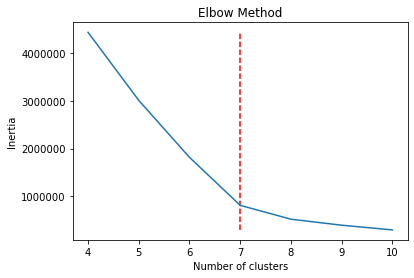

In [49]:
# Clustering of the Frequency Distribution
inertiaArr = []
kVals = range(4, 11)

for k in kVals:
    kmeans = KMeans(n_clusters=k, random_state=2021)
    kmeans.fit(cluster_0.iloc[randInd_0]['Filtered_freq_list'].reshape(-1, 1))
    inertia = kmeans.inertia_

    print('k :', k, '   ', 'cost :', inertia)
    inertiaArr.append(inertia)

inertiaArr = np.array(inertiaArr)
plt.plot(kVals, inertiaArr)
plt.vlines(7, ymin=inertiaArr.min() * 0.9999, ymax=inertiaArr.max() * 1.0003, linestyles='--', colors='r') # elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

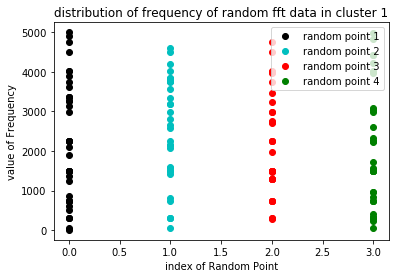

In [14]:
x_1 = [0 for i in range(len(cluster_1.iloc[randInd_1]['Filtered_freq_list']))]
x_2 = [1 for i in range(len(cluster_1.iloc[randInd_1_1]['Filtered_freq_list']))]
x_3 = [2 for i in range(len(cluster_1.iloc[randInd_1_2]['Filtered_freq_list']))]
x_4 = [3 for i in range(len(cluster_1.iloc[randInd_1_3]['Filtered_freq_list']))]

plt.plot(x_1, cluster_1.iloc[randInd_1]['Filtered_freq_list'], 'ko', label='random point 1')
plt.plot(x_2, cluster_1.iloc[randInd_1_1]['Filtered_freq_list'], 'co', label='random point 2')
plt.plot(x_3, cluster_1.iloc[randInd_1_2]['Filtered_freq_list'], 'ro', label='random point 3')
plt.plot(x_4, cluster_1.iloc[randInd_1_3]['Filtered_freq_list'], 'go', label='random point 4')
plt.xlabel('index of Random Point')
plt.ylabel('value of Frequency')
plt.title('distribution of frequency of random fft data in cluster 1')
plt.legend()
plt.show()

k : 5     cost : 1987619.983640172
k : 6     cost : 1114650.8157402636
k : 7     cost : 742154.1653132921
k : 8     cost : 371349.10812261805
k : 9     cost : 244738.73094092205
k : 10     cost : 192279.2492466237
k : 11     cost : 141168.05681409838


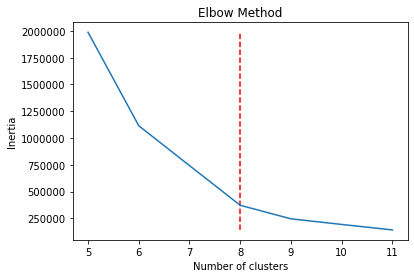

In [43]:
# Clustering of the Frequency Distribution
inertiaArr = []
kVals = range(5, 12)

for k in kVals:
    kmeans = KMeans(n_clusters=k, random_state=2021)
    kmeans.fit(cluster_1.iloc[randInd_1_1]['Filtered_freq_list'].reshape(-1, 1))
    inertia = kmeans.inertia_

    print('k :', k, '   ', 'cost :', inertia)
    inertiaArr.append(inertia)

inertiaArr = np.array(inertiaArr)
plt.plot(kVals, inertiaArr)
plt.vlines(8, ymin=inertiaArr.min() * 0.9999, ymax=inertiaArr.max() * 1.0003, linestyles='--', colors='r') # elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

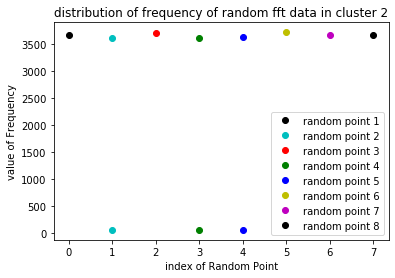

In [20]:
x_1 = [0 for i in range(len(cluster_2.iloc[randInd_2]['Filtered_freq_list']))]
x_2 = [1 for i in range(len(cluster_2.iloc[randInd_2_1]['Filtered_freq_list']))]
x_3 = [2 for i in range(len(cluster_2.iloc[randInd_2_2]['Filtered_freq_list']))]
x_4 = [3 for i in range(len(cluster_2.iloc[randInd_2_3]['Filtered_freq_list']))]
x_5 = [4 for i in range(len(cluster_2.iloc[randInd_2_4]['Filtered_freq_list']))]
x_6 = [5 for i in range(len(cluster_2.iloc[randInd_2_5]['Filtered_freq_list']))]
x_7 = [6 for i in range(len(cluster_2.iloc[randInd_2_6]['Filtered_freq_list']))]
x_8 = [7 for i in range(len(cluster_2.iloc[randInd_2_7]['Filtered_freq_list']))]

plt.plot(x_1, cluster_2.iloc[randInd_2]['Filtered_freq_list'], 'ko', label='random point 1')
plt.plot(x_2, cluster_2.iloc[randInd_2_1]['Filtered_freq_list'], 'co', label='random point 2')
plt.plot(x_3, cluster_2.iloc[randInd_2_2]['Filtered_freq_list'], 'ro', label='random point 3')
plt.plot(x_4, cluster_2.iloc[randInd_2_3]['Filtered_freq_list'], 'go', label='random point 4')
plt.plot(x_5, cluster_2.iloc[randInd_2_4]['Filtered_freq_list'], 'bo', label='random point 5')
plt.plot(x_6, cluster_2.iloc[randInd_2_5]['Filtered_freq_list'], 'yo', label='random point 6')
plt.plot(x_7, cluster_2.iloc[randInd_2_6]['Filtered_freq_list'], 'mo', label='random point 7')
plt.plot(x_8, cluster_2.iloc[randInd_2_7]['Filtered_freq_list'], 'ko', label='random point 8')
plt.xlabel('index of Random Point')
plt.ylabel('value of Frequency')
plt.title('distribution of frequency of random fft data in cluster 2')
plt.legend()
plt.show()

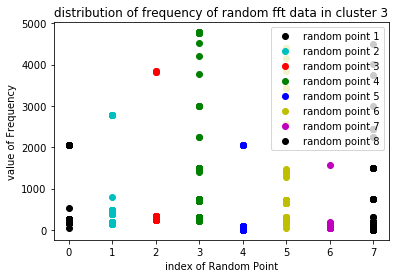

In [19]:
x_1 = [0 for i in range(len(cluster_3.iloc[randInd_3]['Filtered_freq_list']))]
x_2 = [1 for i in range(len(cluster_3.iloc[randInd_3_1]['Filtered_freq_list']))]
x_3 = [2 for i in range(len(cluster_3.iloc[randInd_3_2]['Filtered_freq_list']))]
x_4 = [3 for i in range(len(cluster_3.iloc[randInd_3_3]['Filtered_freq_list']))]
x_5 = [4 for i in range(len(cluster_3.iloc[randInd_3_4]['Filtered_freq_list']))]
x_6 = [5 for i in range(len(cluster_3.iloc[randInd_3_5]['Filtered_freq_list']))]
x_7 = [6 for i in range(len(cluster_3.iloc[randInd_3_6]['Filtered_freq_list']))]
x_8 = [7 for i in range(len(cluster_3.iloc[randInd_3_7]['Filtered_freq_list']))]

plt.plot(x_1, cluster_3.iloc[randInd_3]['Filtered_freq_list'], 'ko', label='random point 1')
plt.plot(x_2, cluster_3.iloc[randInd_3_1]['Filtered_freq_list'], 'co', label='random point 2')
plt.plot(x_3, cluster_3.iloc[randInd_3_2]['Filtered_freq_list'], 'ro', label='random point 3')
plt.plot(x_4, cluster_3.iloc[randInd_3_3]['Filtered_freq_list'], 'go', label='random point 4')
plt.plot(x_5, cluster_3.iloc[randInd_3_4]['Filtered_freq_list'], 'bo', label='random point 5')
plt.plot(x_6, cluster_3.iloc[randInd_3_5]['Filtered_freq_list'], 'yo', label='random point 6')
plt.plot(x_7, cluster_3.iloc[randInd_3_6]['Filtered_freq_list'], 'mo', label='random point 7')
plt.plot(x_8, cluster_3.iloc[randInd_3_7]['Filtered_freq_list'], 'ko', label='random point 8')
plt.xlabel('index of Random Point')
plt.ylabel('value of Frequency')
plt.title('distribution of frequency of random fft data in cluster 3')
plt.legend()
plt.show()

k : 3     cost : 2890082.7298228373
k : 4     cost : 1181351.2912422435
k : 5     cost : 266238.0187983614
k : 6     cost : 139287.01847627255
k : 7     cost : 80414.48162051341
k : 8     cost : 53722.285376370266
k : 9     cost : 31436.496952432204


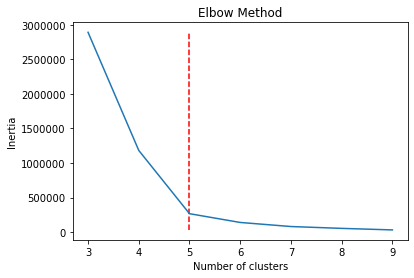

In [60]:
# Clustering of the Frequency Distribution
inertiaArr = []
kVals = range(3, 10)

for k in kVals:
    kmeans = KMeans(n_clusters=k, random_state=2021)
    kmeans.fit(cluster_3.iloc[randInd_3_3]['Filtered_freq_list'].reshape(-1, 1))
    inertia = kmeans.inertia_

    print('k :', k, '   ', 'cost :', inertia)
    inertiaArr.append(inertia)

inertiaArr = np.array(inertiaArr)
plt.plot(kVals, inertiaArr)
plt.vlines(5, ymin=inertiaArr.min() * 0.9999, ymax=inertiaArr.max() * 1.0003, linestyles='--', colors='r') # elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

## 3) Result of Clustering with k = 5

In [49]:
clusteredData_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66524 entries, 0 to 66523
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Filtered_freq_list    66524 non-null  object 
 1   popCount_freq         66524 non-null  float64
 2   popCount_x            66524 non-null  float64
 3   popCount_y            66524 non-null  float64
 4   popDegree_mean_x      66524 non-null  float64
 5   popDegree_mean_y      66524 non-null  float64
 6   popDegree_total_mean  66524 non-null  float64
 7   prediction            66524 non-null  int32  
dtypes: float64(6), int32(1), object(1)
memory usage: 3.8+ MB


In [50]:
clusteredData_5.head()

,Filtered_freq_list,popCount_freq,popCount_x,popCount_y,popDegree_mean_x,popDegree_mean_y,popDegree_total_mean,prediction
0,"[3968.7937587517504, 3969.793958791758, 3970.7...",-4.291769,-4.114624,-3.752816,0.057590,-0.017735,0.050883,1
1,"[3969.793958791758, 3970.7941588317663, 3971.7...",-4.291769,-4.114624,-3.752816,-0.155662,-0.228152,-0.179486,1
2,"[3970.7941588317663, 3971.794358871774, 3972.7...",-4.291769,-4.114624,-3.752816,0.141771,0.031307,0.122098,1
3,"[3970.7941588317663, 3971.794358871774, 3972.7...",-4.078151,-3.851549,-3.437364,-1.365511,-1.316518,-1.425339,1
4,"[1.0002000400080016, 2.000400080016003, 3.0006...",-1.621547,-0.826193,-0.913746,-0.751061,-1.204531,-1.014634,3


### (1) Extract the data by each cluster and rand number

In [51]:
# cluster 별 data 추출
cluster_0 = clusteredData_5[clusteredData_5.prediction == 0]
cluster_1 = clusteredData_5[clusteredData_5.prediction == 1]
cluster_2 = clusteredData_5[clusteredData_5.prediction == 2]
cluster_3 = clusteredData_5[clusteredData_5.prediction == 3]
cluster_4 = clusteredData_5[clusteredData_5.prediction == 4]

print(len(clusteredData_5))
print(len(cluster_0) + len(cluster_1) + len(cluster_2) + len(cluster_3) + len(cluster_4))
print(len(cluster_0), len(cluster_1), len(cluster_2), len(cluster_3), len(cluster_4))

66524
66524
19540 6291 109 40492 92


In [52]:
random.seed(1212)
randInd_0 = random.randrange(0, len(cluster_0))
randInd_1 = random.randrange(0, len(cluster_1))
randInd_2 = random.randrange(0, len(cluster_2))
randInd_3 = random.randrange(0, len(cluster_3))
randInd_4 = random.randrange(0, len(cluster_4))

print(randInd_0)
print(randInd_1)
print(randInd_2)
print(randInd_3)
print(randInd_4)

9829
2360
75
26418
19


### (2) Cluster의 random point 별 Frequency 분포 확인

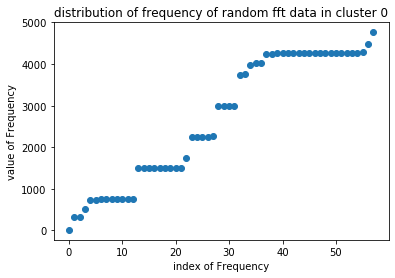

In [53]:
plt.plot(cluster_0.iloc[randInd_0]['Filtered_freq_list'], 'o')
plt.xlabel('index of Frequency')
plt.ylabel('value of Frequency')
plt.title('distribution of frequency of random fft data in cluster 0')
plt.show()

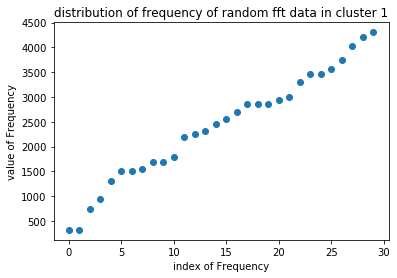

In [54]:
plt.plot(cluster_1.iloc[randInd_1]['Filtered_freq_list'], 'o')
plt.xlabel('index of Frequency')
plt.ylabel('value of Frequency')
plt.title('distribution of frequency of random fft data in cluster 1')
plt.show()

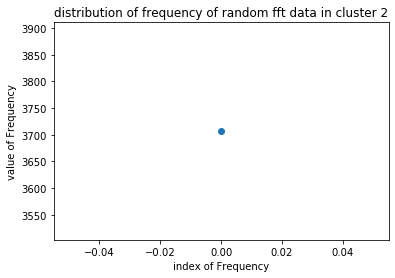

In [55]:
plt.plot(cluster_2.iloc[randInd_2]['Filtered_freq_list'], 'o')
plt.xlabel('index of Frequency')
plt.ylabel('value of Frequency')
plt.title('distribution of frequency of random fft data in cluster 2')
plt.show()

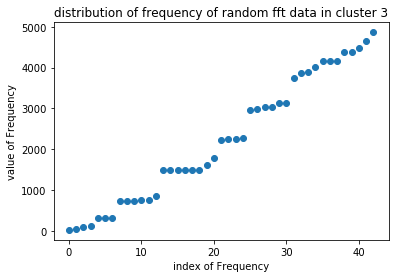

In [56]:
plt.plot(cluster_3.iloc[randInd_3]['Filtered_freq_list'], 'o')
plt.xlabel('index of Frequency')
plt.ylabel('value of Frequency')
plt.title('distribution of frequency of random fft data in cluster 3')
plt.show()

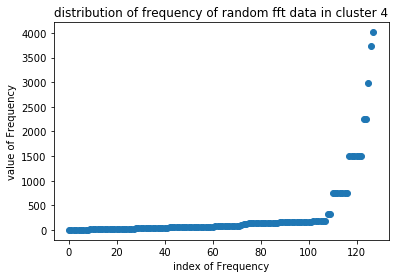

In [58]:
plt.plot(cluster_4.iloc[randInd_4]['Filtered_freq_list'], 'o')
plt.xlabel('index of Frequency')
plt.ylabel('value of Frequency')
plt.title('distribution of frequency of random fft data in cluster 4')
plt.show()

# 4. Clustering of the Frequency Distribution for 'k=4' Results